In [1]:
# This block allows us to import from the benchmark folder,
# as if it was a package installed using pip
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from attrbench.evaluation import deletion_curves
from attrbench.plot import lineplot
from os import path
import os
import pickle as pkl
mpl.rcParams['figure.dpi'] = 150

In [ ]:
filename = "../out/cifar10/deletion_curves/result.pkl"
out_filename = "../out/cifar10/deletion_curves/result_new.pkl"
df = pkl.load(open(filename, "rb"))
x_range = df["mask"].unique()
methods = df["method"].unique()
raw = {}
for method in methods:
    raw[method] = df[df["method"] == method][["logit"]].values.reshape((-1, len(x_range)))
result = {
    "data": raw,
    "x_range": x_range
}
pkl.dump(result, open(out_filename, "wb"))

In [3]:
raw_data = pkl.load(open("../out/cifar10/deletion_curves/result_new.pkl", "rb"))
res = deletion_curves.DeletionCurvesResult(raw_data=raw_data)

/home/arne/Documents/PhD/projects/benchmark/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


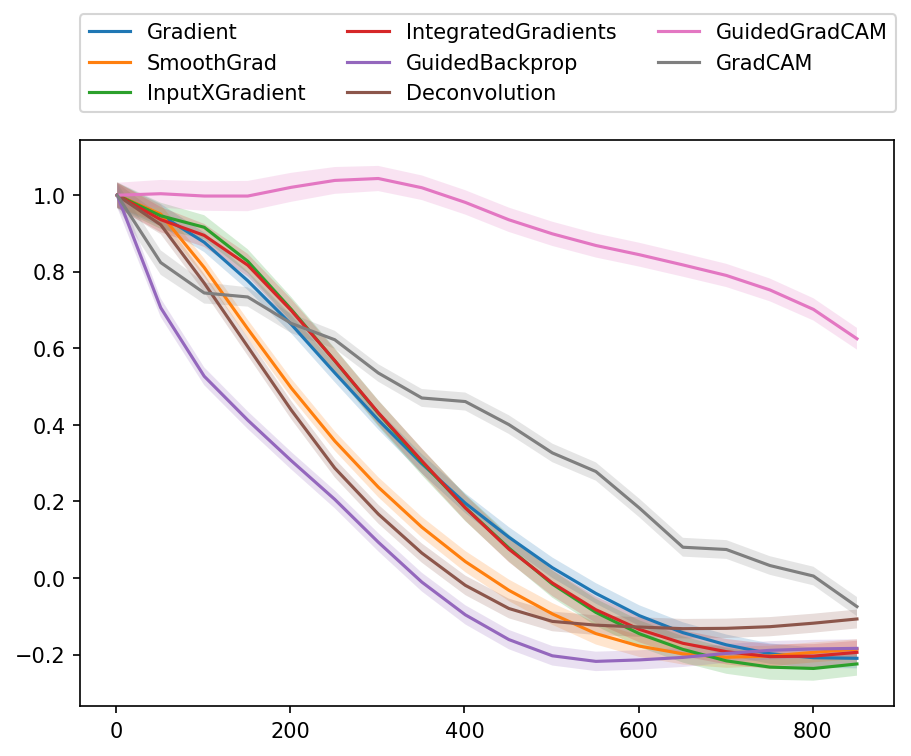

In [5]:
fig, ax = res.plot(interval=True)
fig.show()

In [22]:
import numpy as np
raw_data["data"]["Gradient"] / np.expand_dims(raw_data["data"]["Gradient"][:, 0], -1)

array([[ 1.0000000e+00,  9.2805612e-01,  8.8453573e-01, ...,
        -1.2687714e-01, -1.3333143e-01,  1.8950110e-02],
       [ 1.0000000e+00,  7.9337257e-01,  7.5012964e-01, ...,
        -5.6712508e-01, -7.2847515e-01, -1.0173133e-01],
       [ 1.0000000e+00,  9.1762066e-01,  1.0266421e+00, ...,
        -4.5572802e-01, -6.2441498e-01, -4.8121378e-01],
       ...,
       [ 1.0000000e+00,  9.9168146e-01,  9.3482375e-01, ...,
         1.3665713e-01, -2.9467426e-03, -2.5256389e-01],
       [ 1.0000000e+00,  6.3546318e-01,  1.0049671e+00, ...,
         9.2082453e-01,  1.6659486e+00,  1.3969622e+00],
       [ 1.0000000e+00, -5.6198937e-01, -3.2492456e-01, ...,
         2.2738233e+00,  3.1044154e+00,  2.1192498e+00]], dtype=float32)

In [23]:
raw_data["data"]["Gradient"]

array([[ 6.448198  ,  5.9842896 ,  5.7036614 , ..., -0.8181289 ,
        -0.85974747,  0.12219406],
       [ 2.7645788 ,  2.193341  ,  2.0737925 , ..., -1.567862  ,
        -2.013927  , -0.28124428],
       [ 4.476038  ,  4.107305  ,  4.5952888 , ..., -2.039856  ,
        -2.7949052 , -2.1539311 ],
       ...,
       [ 9.684445  ,  9.603885  ,  9.053249  , ...,  1.3234485 ,
        -0.02853757, -2.4459412 ],
       [-2.3326452 , -1.4823102 , -2.3442316 , ..., -2.1479568 ,
        -3.8860672 , -3.258617  ],
       [ 1.1343225 , -0.6374772 , -0.36856925, ...,  2.579249  ,
         3.5214083 ,  2.4039128 ]], dtype=float32)

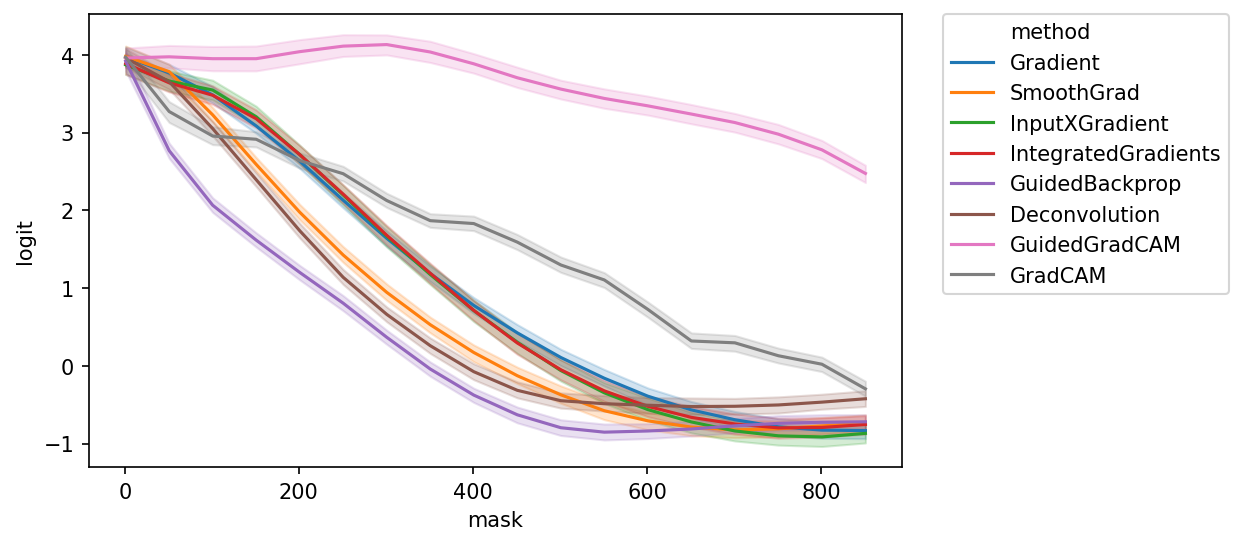

In [8]:
lineplot("../out/cifar10/deletion_curves/", x="mask", y="logit")

/home/arne/Documents/PhD/projects/benchmark/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


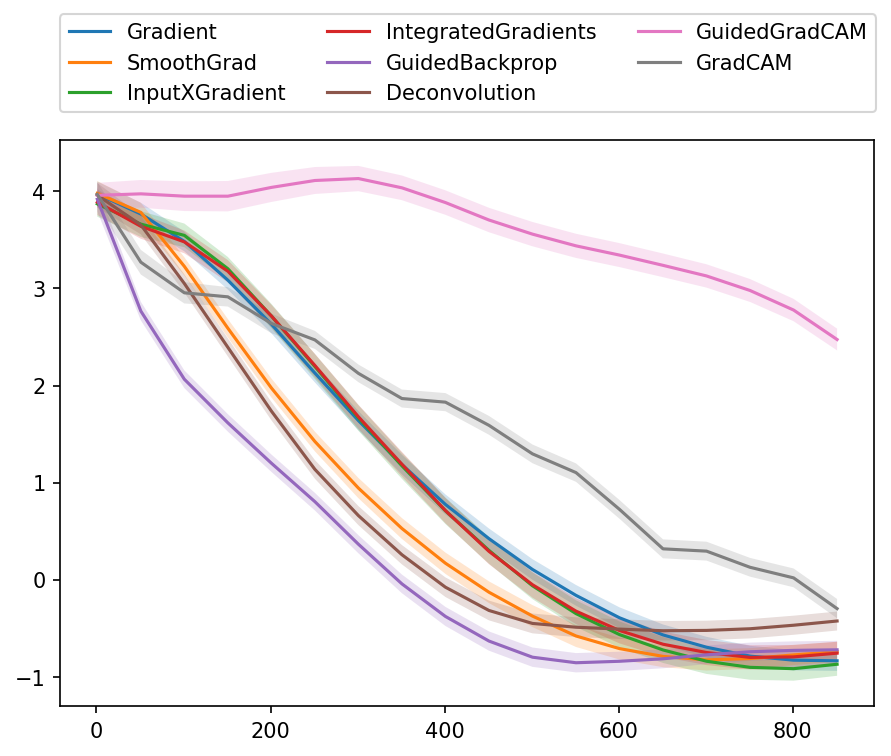

In [4]:
fig, ax = res.plot(interval=True)
fig.show()